In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
Geron = r'C:\Users\lu.jin01\OneDrive - Cardinal Health\2.Jpt_code\Geron'
housing = pd.read_csv(Geron+r'\datasets\housing\housing.csv')

In [796]:
# import pandas_profiling
# profile = housing.profile_report(title='01 CA Housing')
# profile.to_file(output_file="01 CA Housing.html")

## 1. Data Exploration

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


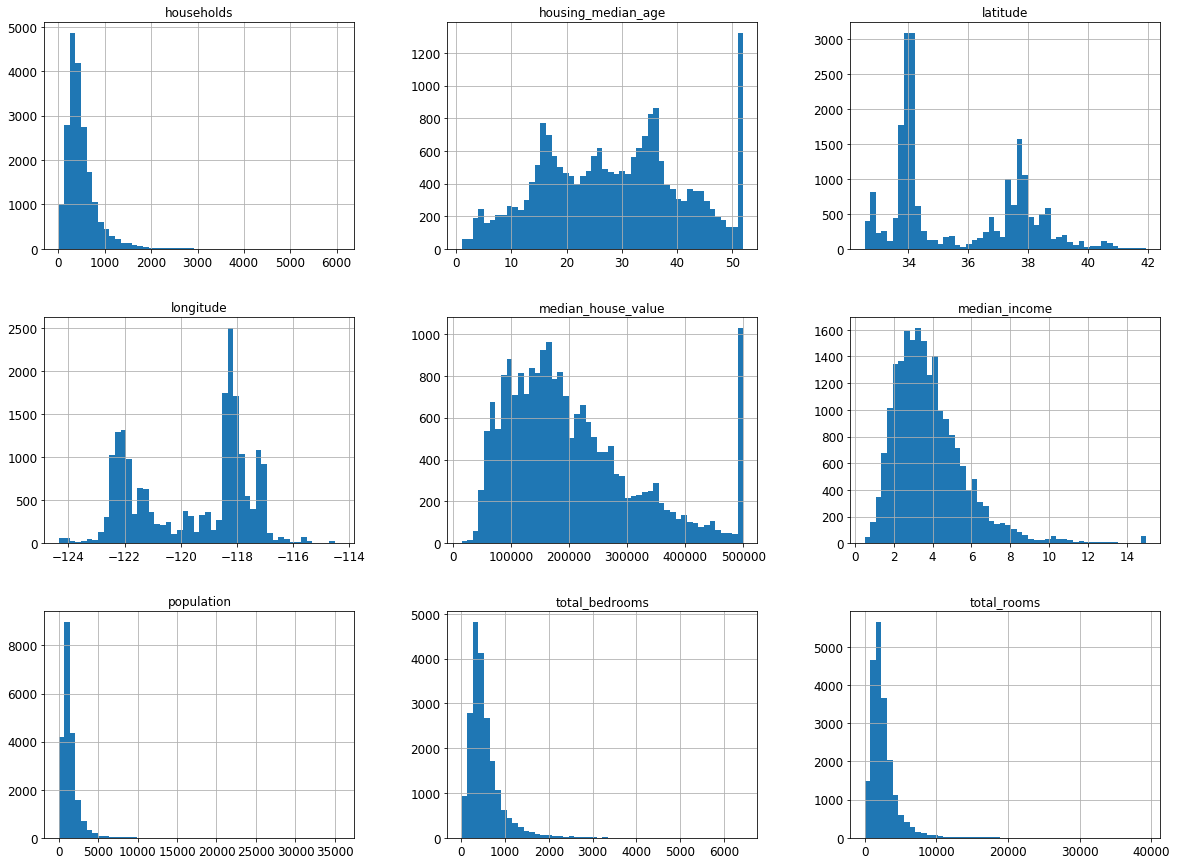

In [15]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [10]:
# explore string attribute
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

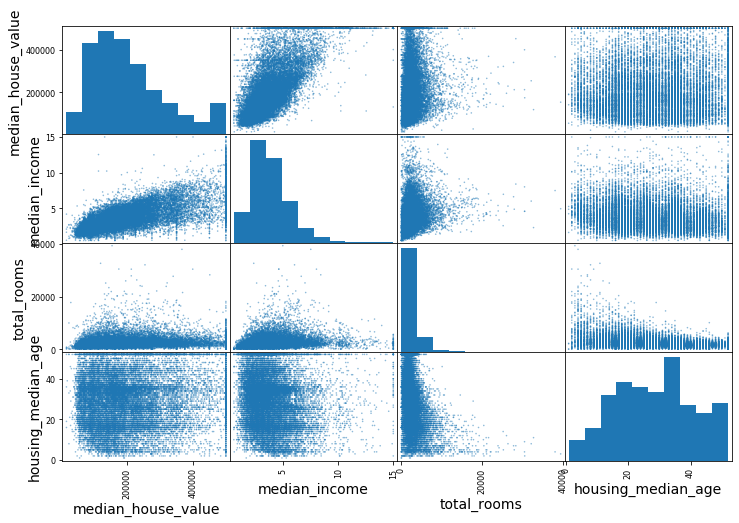

In [28]:
# explore correlation with label
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8), s = 10)
plt.show()

In [33]:
housing.drop(['longitude','latitude'],axis=1).corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


## 2. Split to test train dataset

***since median_income is highly correlated with housing price, we need to stratify split data based on median_income***

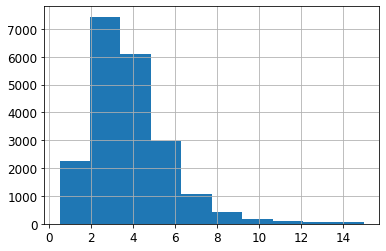

In [37]:
# check median_income distrbution
housing.median_income.hist()

In [39]:
pd.cut?

In [40]:
# group median_income into smaller bins
binx = [0, 1.5, 3, 4.5, 6, np.inf]
labelx = [1,2,3,4,5]
housing['income_cat']=pd.cut(housing['median_income'], bins=binx, labels=labelx)

In [119]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=7) 

split_gen = split.split(housing, housing['income_cat']) # this creates a generator of two arrays of input df indices
for train_index, test_index in split_gen:
    housing_train = housing.iloc[train_index].copy()
    housing_test = housing.iloc[test_index].copy()

In [120]:
# remove the income_cat attribute so the data is back to its original state:
for set_ in (housing_train, housing_test):
    set_.drop("income_cat", axis=1, inplace=True)

(16512, 10)


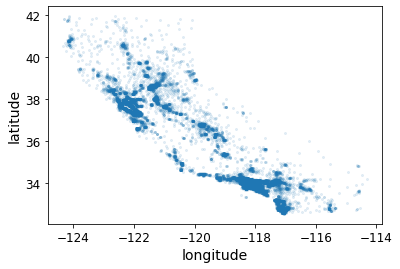

In [124]:
# create a copy of the training set
train = housing_train.copy()
print(train.shape)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=4)
plt.show()

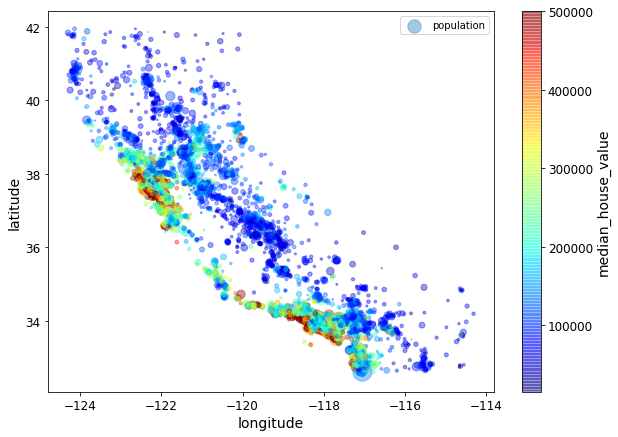

In [78]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

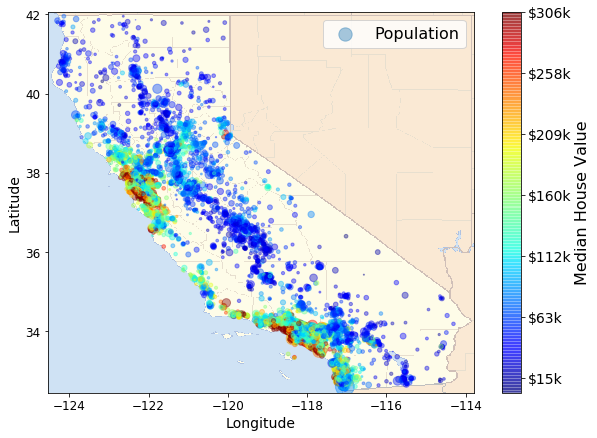

In [91]:
import matplotlib.image as mpimg
pic = 'C:/Users/lu.jin01/OneDrive - Cardinal Health/2.Jpt_code/Geron/images/end_to_end_project/california.png'
try:
    cal_map = mpimg.imread(pic)

    ax = train.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                           s=housing['population']/100, label="Population",
                           c="median_house_value", cmap=plt.get_cmap("jet"),
                           colorbar=False, alpha=0.4,
                          )
    plt.imshow(cal_map, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
               cmap=plt.get_cmap("jet"))
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)

    prices = train["median_house_value"]
    tick_values = np.linspace(prices.min(), prices.max(), 11)
    cbar = plt.colorbar()
    # transform an format color bar ticklabels
    cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
    cbar.set_label('Median House Value', fontsize=16)

    plt.legend(fontsize=16)
    plt.show()
except:
    print('California map not in the folder')

## 3. Prepare data and compile all estimators into a whole pipeline

In [126]:
# seperate features and label
features = train.drop("median_house_value", axis=1)
label = train["median_house_value"].copy()

***build transform pipeline for num features***

In [127]:
features.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12448,-114.65,33.60,28.0,1678.0,322.0,666.0,256.0,2.9653,INLAND
2745,-115.57,32.79,34.0,1152.0,208.0,621.0,208.0,3.6042,INLAND


In [133]:
# build class to create new features
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class AddFeatures(BaseEstimator, TransformerMixin):
    """
    Create new features using existing ones
    In: features in 2d array
    Out: expanded 2d array
    """
    def __init__(self, add_bedrooms_to_rooms):
        self.add_bedrooms_to_rooms = add_bedrooms_to_rooms
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): # have to use [:, index] to access arrays
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_to_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_to_rooms:
            bedrooms_to_rooms = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_to_household, bedrooms_to_rooms]
        else:
            return np.c_[X, rooms_per_household, population_to_household]

In [138]:
# create pipeline for numeric features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill null with median
        ('attribs_adder', AddFeatures(add_bedrooms_to_rooms = True)), # add features
        ('std_scaler', StandardScaler()), # standardize each feature to std-normal distribution
    ])

In [407]:
# create full pre-processing pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

feature_list = features.columns.tolist()
num_features = feature_list[:-1]
text_features = ['ocean_proximity']

preprocess_pipeline = ColumnTransformer([
    ('num_trans', num_pipeline, num_features),
    ('text_trans', OneHotEncoder(), text_features),
])

In [178]:
preprocessed = preprocess_pipeline.fit_transform(features)
preprocessed[:,5]

array([-0.69555425, -0.73714681,  0.50878127, ...,  0.25737739,
       -0.16594239, -1.28894136])

In [179]:
preprocessed.shape

(16512, 16)

## 4. Train models

### 4.1 Try Linear regresion first

In [182]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(preprocessed, label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
# check root mean squared error
from sklearn.metrics import mean_squared_error
y_hat = lin_reg.predict(preprocessed)
rmse = np.sqrt(mean_squared_error(label, y_hat))
round(rmse,0)

68027.0

In [193]:
def print_cv_score(lis):
    print('mean:', round(lis.mean(),0), '|std:', round(lis.std(),0), 'min:', round(lis.min(),0), 'max:', round(lis.max(),0))
    
# use cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, preprocessed, label, scoring = 'neg_mean_squared_error',cv=10)
lin_reg_scores = np.sqrt(-scores)
print_cv_score(lin_reg_scores)

mean: 68445.0 |std: 2009.0 min: 65054.0 max: 72608.0


### 4.2 Use SVM regression cross-validation

In [220]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svm_reg = SVR()
param_grid = {'kernel':('linear', 'rbf'), 'C':[100, 1000, 10000], 'gamma':['auto','scale']}
svr_grid = GridSearchCV(svm_reg, param_grid, scoring = 'neg_mean_squared_error', cv=5, return_train_score=True)
svr_grid.fit(preprocessed, label)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 1000, 10000], 'gamma': ['auto', 'scale'],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=0)

In [221]:
svr_grid.best_params_

{'C': 10000, 'gamma': 'scale', 'kernel': 'rbf'}

In [225]:
pd.DataFrame(svr_grid.cv_results_)
df['rmse'] = np.sqrt(-df['mean_train_score'])
df[['param_C','param_kernel','rmse','mean_train_score','std_train_score']]

,param_C,param_kernel,rmse,mean_train_score,std_train_score
0,5,linear,94908.587066,-9.007640e+09,9.176627e+07
1,5,rbf,117020.397553,-1.369377e+10,1.506739e+08
2,100,linear,71284.085369,-5.081421e+09,5.799062e+07
3,100,rbf,97518.266985,-9.509812e+09,1.004892e+08
4,1000,linear,69905.489677,-4.886777e+09,5.446617e+07
5,1000,rbf,70679.036306,-4.995526e+09,6.985601e+07
6,10000,linear,69754.094127,-4.865634e+09,4.106330e+07
7,10000,rbf,61365.862721,-3.765769e+09,6.163473e+07


In [226]:
df.rmse.min()

61365.862721404446

appears to perform better than Linear Regression but worse than Random Forest Regression, try testing data next

In [229]:
# seperate features and label for testing data
features_test = housing_test.drop("median_house_value", axis=1)
label_test = housing_test["median_house_value"].copy()

In [231]:
model = svr_grid.best_estimator_
model

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [264]:
features_test_preped = preprocess_pipeline.fit_transform(features_test)
print('testing array shape:', features_test_preped.shape, '|training array shape:', preprocessed.shape)

testing array shape: (4128, 15) |training array shape: (16512, 16)


In [268]:
# because the testing data only has 4 values for the text attribute while the training has 5
print('train:', features.iloc[:,-1].unique().tolist())
print('test:', features_test.iloc[:,-1].unique().tolist())

train: ['INLAND', 'NEAR OCEAN', '<1H OCEAN', 'NEAR BAY', 'ISLAND']
test: ['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY']


In [285]:
# add a column for the missing label
features_test_preped2 = np.column_stack((features_test_preped,np.zeros(features_test_preped.shape[0])))

In [288]:
y_hat_test = model.predict(features_test_preped2)
svr_rmse = np.sqrt(mean_squared_error(label_test,y_hat_test))
print('RMSE score applying the best SVR model from GridSearch: ',round(svr_rmse,0))

RMSE score applying the best SVR model from GridSearch:  60244.0


## 5. Replace GridSearch with RandomSearch 

In [295]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
rnd_search.fit(preprocessed, label)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.2min
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 22.5min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 35.1min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024A0C5A8288>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024A0C5A83C8>,
                                        'kernel': ['linear', 'rbf']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [299]:
svm_rnd_rmse = np.sqrt(-rnd_search.best_score_)
svm_rnd_rmse

54395.95778614708

In [304]:
rnd_search.best_params_

{'C': 157055.10989448498, 'gamma': 0.26497040005002437, 'kernel': 'rbf'}

In [797]:
import joblib
joblib.dump(rnd_search, '01 SVR rnd_search')

['01 SVR rnd_search']

## 6. Build feature reduction estimator into a pipeline 

In [320]:
# use Random forest regression to get feature importance
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }
forest_rnd = RandomizedSearchCV(RandomForestRegressor(random_state = 0), param_distribs, n_iter=6, cv=4,
                               scoring = 'neg_mean_squared_error', random_state=7)

In [324]:
forest_rnd.fit(preprocessed, label)

RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [326]:
round(np.sqrt(-forest_rnd.best_score_))

49312.0

In [331]:
importances = forest_rnd.best_estimator_.feature_importances_

In [439]:
# get the feature names
new =  ['rooms_per_household', 'population_to_household', 'bedrooms_to_rooms']
cat = OneHotEncoder().fit(features[text_features]).categories_[0].tolist()
feature_names = num_features + new + cat
print(len(importances)==len(feature_names))

True


In [332]:
importances

array([8.01927860e-02, 7.53680846e-02, 4.25920490e-02, 2.03995585e-02,
       1.85084762e-02, 1.97643044e-02, 1.77036064e-02, 3.11557413e-01,
       6.76974435e-02, 1.02934865e-01, 7.62700429e-02, 1.40966058e-02,
       1.41227790e-01, 2.37140475e-04, 4.90402214e-03, 6.54581222e-03])

In [333]:
np.sort(importances)

array([2.37140475e-04, 4.90402214e-03, 6.54581222e-03, 1.40966058e-02,
       1.77036064e-02, 1.85084762e-02, 1.97643044e-02, 2.03995585e-02,
       4.25920490e-02, 6.76974435e-02, 7.53680846e-02, 7.62700429e-02,
       8.01927860e-02, 1.02934865e-01, 1.41227790e-01, 3.11557413e-01])

In [445]:
np.argpartition(importances,-4)[-4:]

array([ 0, 12,  9,  7], dtype=int64)

Now we have the feature_importance array, use it for feature dropping

In [472]:
class KeepImportantFeatures(BaseEstimator, TransformerMixin):
    """
    in: importance_list, a 1d array of feature importances from a model like RandomForestRegressor
        k, the top k_th ranked features
    out: partial features
    """
    def __init__(self, importance_list, k):
        self.importance_list = importance_list
        self.k = k
    def fit(self, X, y=None):
        self.indices_ = np.argpartition(self.importance_list,-self.k)[-self.k:]
        return self
    def transform(self, X):
        return X[:, self.indices_]

In [770]:
k=3
key_feats = KeepImportantFeatures(importances,k).fit(preprocessed,label)
np.array(feature_names)[key_feats.indices_]

array(['population_to_household', 'INLAND', 'median_income'], dtype='<U23')

In [771]:
# check transformor against manual processed results
sorted(zip(importances, feature_names))[-5:]

[(0.07627004286687626, 'bedrooms_to_rooms'),
 (0.08019278603354676, 'longitude'),
 (0.10293486498196089, 'population_to_household'),
 (0.14122779012665704, 'INLAND'),
 (0.31155741280063154, 'median_income')]

In [772]:
preprocess_dropfeature_pipeline = Pipeline([ ('prep_feat',preprocess_pipeline), 
                                   ('drop_feat',KeepImportantFeatures(importances, k=8))
                                           ])

In [773]:
preprocessed_short = preprocess_dropfeature_pipeline.fit_transform(features)
preprocessed_short.shape

(16512, 8)

##### It works! Now try using Function Transformer

In [591]:
from sklearn.preprocessing import FunctionTransformer

def drop_features(X, importance_list, k):
    index_array = np.argpartition(importance_list, -k)[-k:]
    return X[:,index_array]

KeepImportantFeatures2 = FunctionTransformer(drop_features, validate=False, kw_args={"importance_list": importances,'k': 5})

In [592]:
drop_features(preprocessed, importances, 3).shape

(16512, 3)

In [602]:
KeepImportantFeatures2.fit_transform(preprocessed).shape

(16512, 5)

##### Seems easier to build a function transformer than a Class

## 7. Build a single long pipeline from Data Prep to Final Modeling

In [609]:
forest_rnd.best_params_

{'max_features': 5, 'n_estimators': 186}

In [786]:
prep_shorten_train_pipe = Pipeline([
    ('prep_feat', preprocess_pipeline),
    ('drop_feat', KeepImportantFeatures(importances, 5)),
    ('forest', RandomForestRegressor(**forest_rnd.best_params_))
#     ('svr_grid',SVR(**svr_grid.best_params_))
])

In [787]:
prep_shorten_train_pipe.fit(features,label)

Pipeline(memory=None,
         steps=[('prep_feat',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num_trans',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                          

In [663]:
some_data = features_test.iloc[:4]
some_labels = label_test.iloc[:4]

print("Predictions:\t", prep_shorten_train_pipe.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [144555.91397849 265537.09677419 349828.51075269 181427.95698925]
Labels:		 [185600.0, 253100.0, 392800.0, 120000.0]


In [682]:
# check the score on testing data
y_hat_short = prep_shorten_train_pipe.predict(features_test)
print('with only top features:\t', round(np.sqrt(mean_squared_error(y_hat_short,label_test))))

forest_rnd.best_estimator_.fit(preprocessed,label)
y_hat_full = forest_rnd.best_estimator_.predict(features_test_preped2)
print('with all features:\t', round(np.sqrt(mean_squared_error(y_hat_full,label_test))))

with only top features:	 54699.0
with all features:	 61574.0


Dropping features seem to help based on this RandForestReg model

## 8. Build a pipeline to explore preperation options automatically

In [781]:
list(range(k,len(importances)+1,2))

[3, 5, 7, 9, 11, 13, 15]

In [788]:
params = {
            'prep_feat__num_trans__imputer__strategy': ['mean', 'median', 'most_frequent'],
            'drop_feat__k': list(range(5,len(importances)+1,2)),
            'forest':[RandomForestRegressor(**forest_rnd.best_params_), lin_reg, svm_reg]
         }

In [789]:
grid_prep = GridSearchCV(prep_shorten_train_pipe, param_grid=params, cv=5,
                        scoring='neg_mean_squared_error', verbose=2, n_jobs=4)
grid_prep.fit(features, label)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  8.1min
C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done 270 out of 270 | elapsed: 14.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('prep_feat',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num_trans',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                 

In [790]:
grid_prep.best_params_

{'drop_feat__k': 9,
 'forest': RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=186,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False),
 'prep_feat__num_trans__imputer__strategy': 'mean'}

In [791]:
round(np.sqrt(-grid_prep.best_score_))

49027.0

In [799]:
joblib.dump(grid_prep, '01 Grid Search prep and model')

['01 Grid Search prep and model']

In [801]:
joblib.dump([features,label],'01 Train Data')

['01 Train Data']